In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("Books.csv")
dataset.head()

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
dataset.shape

(1070, 14)

In [5]:
# dataset.info()

In [6]:
dataset.columns

Index(['Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [7]:
dataset.dtypes

Publishing Year        float64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object

In [8]:
dataset['Book Name'].isnull().value_counts()

False    1047
True       23
Name: Book Name, dtype: int64

### Getting rid of null values:

In [9]:
dataset = dataset.dropna()
dataset.shape

(998, 14)

In [10]:
# renaming columns
dataset.rename(columns = {"Publishing Year":"Year","Book Name":"Name","language_code":"Lang","Publisher ":"Publisher"}, inplace = True)

In [11]:
dataset.Year = dataset.Year.astype(int)
dataset.Year.dtype

dtype('int32')

### What are the main statistical сalculations?

In [12]:
dataset.describe()

,Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,998.000000,998.000000,998.000000,998.00000,998.000000,998.000000,998.000000,998.000000
mean,1971.070140,4.003056,95500.622244,1885.08515,848.897952,4.839649,605.750501,9802.312625
std,190.019592,0.247360,31650.845116,4023.26877,2303.504061,3.585046,369.174705,15503.088302
min,-560.000000,2.970000,27308.000000,104.94000,0.000000,0.990000,1.000000,106.000000
25%,1985.000000,3.850000,70946.500000,370.88250,0.000000,1.990000,283.000000,555.000000
50%,2003.000000,4.010000,89901.000000,806.25000,260.619000,3.990000,591.500000,3915.000000
75%,2010.000000,4.170000,115596.000000,1492.96500,721.180500,6.990000,919.500000,5420.250000
max,2016.000000,4.770000,206792.000000,47795.00000,28677.000000,33.860000,1273.000000,61560.000000


### What are the correlation between the parameters/columns in this dataset? 

In [13]:
corr = dataset.loc[:].corr()
corr  # correlation rate

,Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
Year,1.000000,0.057525,-0.000284,0.007352,0.006247,0.027647,0.016711,-0.016393
Book_average_rating,0.057525,1.000000,0.099659,-0.050138,-0.054237,-0.013554,-0.030431,-0.000270
Book_ratings_count,-0.000284,0.099659,1.000000,0.498865,0.396267,-0.073152,-0.834705,-0.259968
gross sales,0.007352,-0.050138,0.498865,1.000000,0.911125,0.270742,-0.440192,-0.152192
publisher revenue,0.006247,-0.054237,0.396267,0.911125,1.000000,0.310049,-0.336351,-0.116363
sale price,0.027647,-0.013554,-0.073152,0.270742,0.310049,1.000000,0.078373,-0.000943
sales rank,0.016711,-0.030431,-0.834705,-0.440192,-0.336351,0.078373,1.000000,0.221921
units sold,-0.016393,-0.000270,-0.259968,-0.152192,-0.116363,-0.000943,0.221921,1.000000


### Let's visualize the correlations:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

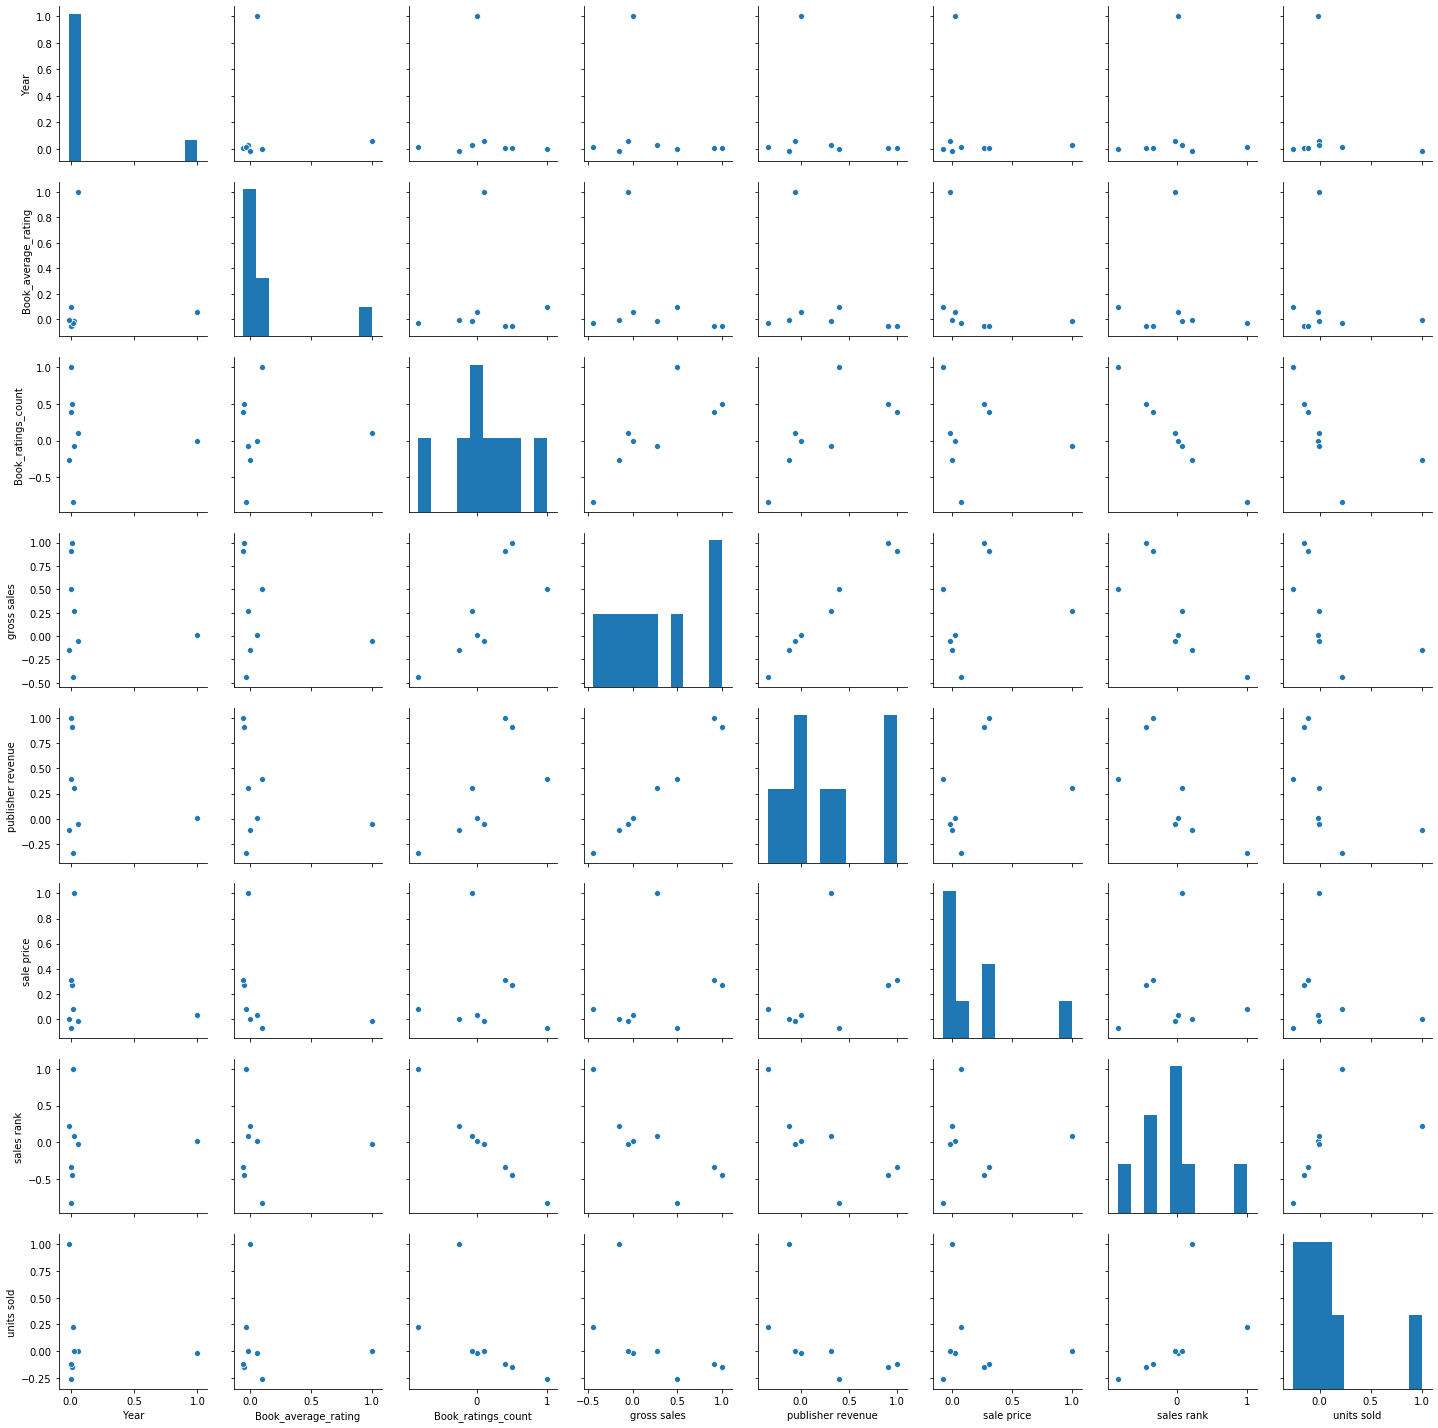

In [15]:
sns.pairplot(corr)
plt.show()

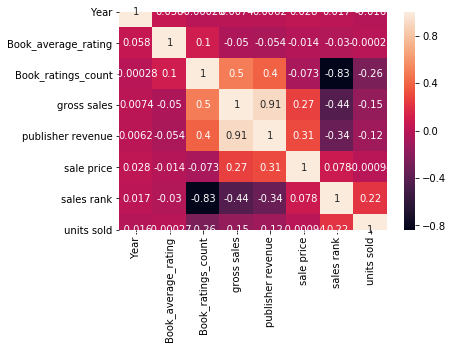

In [16]:
sns.heatmap(corr, annot = True)
plt.show()

In [17]:
dataset.sample(3)

,Year,Name,Author,Lang,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
585,2010,The Immortals of Meluha,Amish Tripathi,eng,Intermediate,4.00,62784,genre fiction,418.60,251.160,2.99,658,"Amazon Digital Services, Inc.",56808
465,1997,Three to Get Deadly,Janet Evanovich,en-US,Excellent,4.14,113400,genre fiction,1109.79,665.874,6.49,517,Hachette Book Group,4617
587,2013,Requiem,Lauren Oliver,eng,Intermediate,3.74,100593,genre fiction,698.60,0.000,4.99,659,"Amazon Digital Services, Inc.",55080


## Who are the publishers in this dataset?

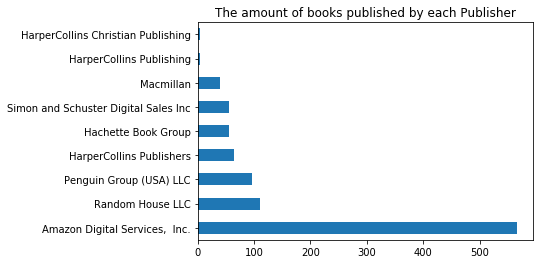

In [103]:
publishers = dataset['Publisher'].value_counts(normalize=False)
publishers.plot(kind='barh', title="The amount of books published by each Publisher")
plt.show()

### What about book languages?

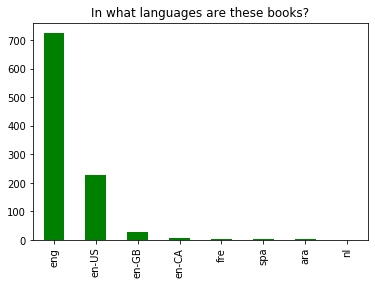

In [104]:
langs = dataset.Lang.value_counts(normalize=False)
langs.plot.bar(title="In what languages are these books?", color='g')

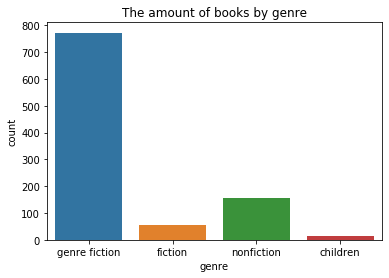

In [105]:
sns.countplot(dataset.genre)
plt.title('The amount of books by genre')
plt.show()

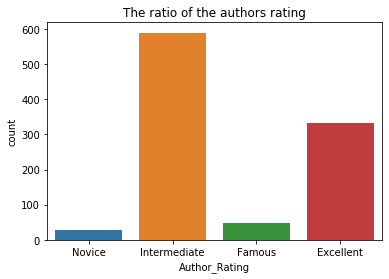

In [60]:
sns.countplot(dataset['Author_Rating'])
plt.title("The ratio of the authors rating")
plt.show()

### How many books was written by each athor? 
###     ..and who had wrote the greatest amount of book?

In [121]:
dataset.Author.value_counts(normalize=False)

Stephen King                        27
Jim Butcher                         10
Charlaine Harris                    10
Nicholas Sparks                     10
Jodi Picoult                         9
                                    ..
Dalai Lama XIV, Howard C. Cutler     1
Mary Roach                           1
Edith Wharton, Nina Bawden           1
Patrick Ness                         1
Jaycee Dugard                        1
Name: Author, Length: 698, dtype: int64

In [126]:
dataset[dataset.Year > 0].Year.value_counts(ascending=True)
# sns.countplot(years)

1308     1
1883     1
1886     1
1890     1
1891     1
        ..
2006    40
2010    41
2009    45
2011    54
2012    59
Name: Year, Length: 141, dtype: int64

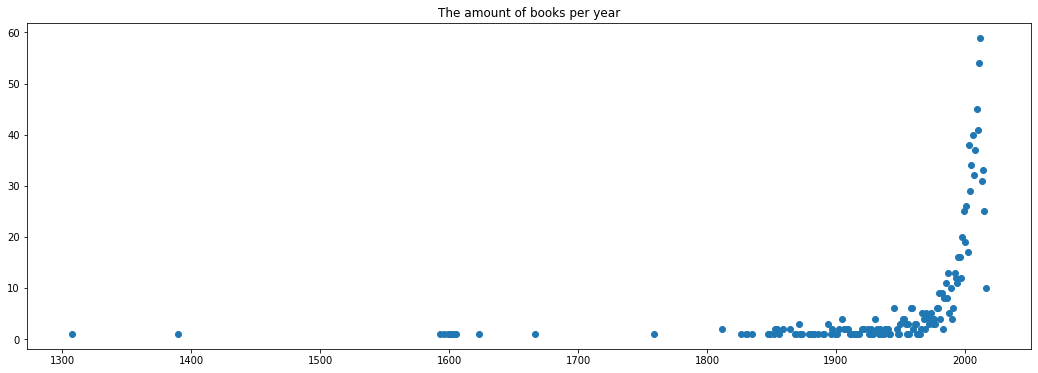

In [139]:
plt.figure(figsize=(18,6))
plt.scatter(dataset[dataset.Year > 0]['Year'].value_counts().index, dataset[dataset.Year > 1000]['Year'].value_counts())
plt.title('The amount of books per year')
plt.show()
# sns.countplot(dataset[dataset.Year > 1000]['Year'])
# plt.xticks(rotation=90)
# plt.show()

### The best seller book is..

In [148]:
dataset[dataset["units sold"] == dataset["units sold"].max()]

,Year,Name,Author,Lang,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
578,2009,New Moon: The Complete Illustrated Movie Compa...,Mark Cotta Vaz,en-US,Excellent,4.34,82399,genre fiction,1560.58,936.348,10.99,647,Penguin Group (USA) LLC,61560


### The 5 top rated books are ..

In [149]:
# dataset[dataset["Book_average_rating"] == dataset["Book_average_rating"].max()]
df = dataset.sort_values('Book_average_rating',ascending=False)
df.head()

,Year,Name,Author,Lang,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
331,2014,Words of Radiance,Brandon Sanderson,eng,Famous,4.77,73572,genre fiction,741.52,444.912,2.99,354,HarperCollins Publishers,248
777,2016,A Court of Mist and Fury,Sarah J. Maas,eng,Famous,4.72,108384,genre fiction,1158.84,695.304,9.99,900,Simon and Schuster Digital Sales Inc,28512
479,1988,The Essential Calvin and Hobbes: A Calvin and ...,Bill Watterson,en-US,Famous,4.65,93001,genre fiction,166.32,0.000,0.99,530,"Amazon Digital Services, Inc.",4536
31,2010,The Way of Kings,Brandon Sanderson,eng,Famous,4.64,144822,genre fiction,2178.00,0.000,0.99,32,"Amazon Digital Services, Inc.",2200
249,1987,Calvin and Hobbes,"Bill Watterson, G.B. Trudeau",en-US,Famous,4.61,117788,nonfiction,1886.22,1131.732,4.99,273,Penguin Group (USA) LLC,378


### NAIVE BAYES (NB)

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [78]:
nb = GaussianNB()
x,y = dataset.drop(['Name','Author','Lang','Author_Rating','genre','Publisher'],axis=1), dataset['genre']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
nb.fit(x_train,y_train)
prediction = nb.predict(x_test)

print('With NB accuracy is: ',nb.score(x_test,y_test)) # accuracy

With NB accuracy is:  0.38666666666666666


### K-NEAREST NEIGHBOUR (kNN) Algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [91]:
# declaring the classifer
knn = KNeighborsClassifier(n_neighbors = 3)

# preparing the input variable x, and target output y
x,y = dataset.drop(['Name','Author','Lang','Author_Rating','genre','Publisher'],axis=1), dataset['genre']

# splitting the dataset into two parts, one for training, one for testing the model later
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

# fitting the model using the training data
knn.fit(x_train,y_train)

# making prediction with the input from test data
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.7033333333333334


### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [93]:
dtree = DecisionTreeClassifier()
# x,y
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dtree.fit(x_train,y_train)
prediction = dtree.predict(x_test)

print('With Decision tree accuracy is: ',dtree.score(x_test,y_test)) # accuracy

With Decision tree accuracy is:  0.6833333333333333


### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [96]:
rf = RandomForestClassifier()
# x,y 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)

print('With Random Forest accuracy is: ', rf.score(x_test,y_test)) # accuracy

C:\Users\Shynar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Support Vector Machine 

In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

In [102]:
X,y = dataset.iloc[:,1:3], pd.factorize(dataset['Book_average_rating'])[0]

# Define the boundaries for the graphs we will draw later
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

TypeError: unsupported operand type(s) for -: 'str' and 'int'